# IDR Download & Timeshift

In [1]:
import os
import math
import numpy as np
import pandas as pd
import datetime as dt
from collections import deque
from matplotlib import pyplot as plt
import cx_Oracle
from subprocess import Popen, PIPE
import EWX_forecast as ewx

base = os.getcwd()
data = os.path.join(base, 'csv')
print('working in {}, reading data from {}.'.format(base, data))

working in C:\Users\wb5888\LA-tools\EWX_Forecast, reading data from C:\Users\wb5888\LA-tools\EWX_Forecast\csv.


## Meters to download

In [2]:
meters = ['NEPOOL_NRI_2529175006', 'NEPOOL_NRI_4703951002', 'NEPOOL_NRI_6507868006', 'NEPOOL_NRI_9111788007']
filenames = [".".join([x, 'csv']) for x in meters]
filenames

['NEPOOL_NRI_2529175006.csv',
 'NEPOOL_NRI_4703951002.csv',
 'NEPOOL_NRI_6507868006.csv',
 'NEPOOL_NRI_9111788007.csv']

### Show directory files

In [3]:
file_df = ewx.sortdir(data, 5)
file_df

files found in dir:  C:\Users\wb5888\LA-tools\EWX_Forecast\csv
                                 files                time
0  NEPOOL_NRI_9111788007_timeshift.csv 2019-06-28 09:17:36
1        NEPOOL_NRI_9111788007_val.csv 2019-06-28 09:17:34
2  NEPOOL_NRI_6507868006_timeshift.csv 2019-06-28 09:17:33
3        NEPOOL_NRI_6507868006_val.csv 2019-06-28 09:17:30
4  NEPOOL_NRI_4703951002_timeshift.csv 2019-06-28 09:17:30


,files,time
0,NEPOOL_NRI_9111788007_timeshift.csv,2019-06-28 09:17:36
1,NEPOOL_NRI_9111788007_val.csv,2019-06-28 09:17:34
2,NEPOOL_NRI_6507868006_timeshift.csv,2019-06-28 09:17:33
3,NEPOOL_NRI_6507868006_val.csv,2019-06-28 09:17:30
4,NEPOOL_NRI_4703951002_timeshift.csv,2019-06-28 09:17:30


## Read IDR

In [5]:
meter_data = []
for m in filenames:
    meter = m.split('.')[0]
    idr = ewx.read_idr(m, 0)
    meter_data.append((meter, idr))

meter_data = dict(meter_data)
print('read data into dict w/ {} elements.'.format(len(meter_data.keys())))

read data into dict w/ 4 elements.


### Merge data

In [6]:
master = ewx.merge_idr(meter_data)

                     NEPOOL_NRI_2529175006  NEPOOL_NRI_4703951002  \
t                                                                   
2015-05-01 00:00:00                   7.84                   2.82   
2015-05-01 01:00:00                   7.92                   2.97   
2015-05-01 02:00:00                   7.36                   1.71   
2015-05-01 03:00:00                   7.84                   2.85   
2015-05-01 04:00:00                   7.84                   2.79   

                     NEPOOL_NRI_6507868006  NEPOOL_NRI_9111788007  
t                                                                  
2015-05-01 00:00:00                  26.04                 27.360  
2015-05-01 01:00:00                  26.04                 29.808  
2015-05-01 02:00:00                  24.66                 41.520  
2015-05-01 03:00:00                  24.90                 41.616  
2015-05-01 04:00:00                  25.68                 31.248  


### Plot IDR

graphing forecasts...


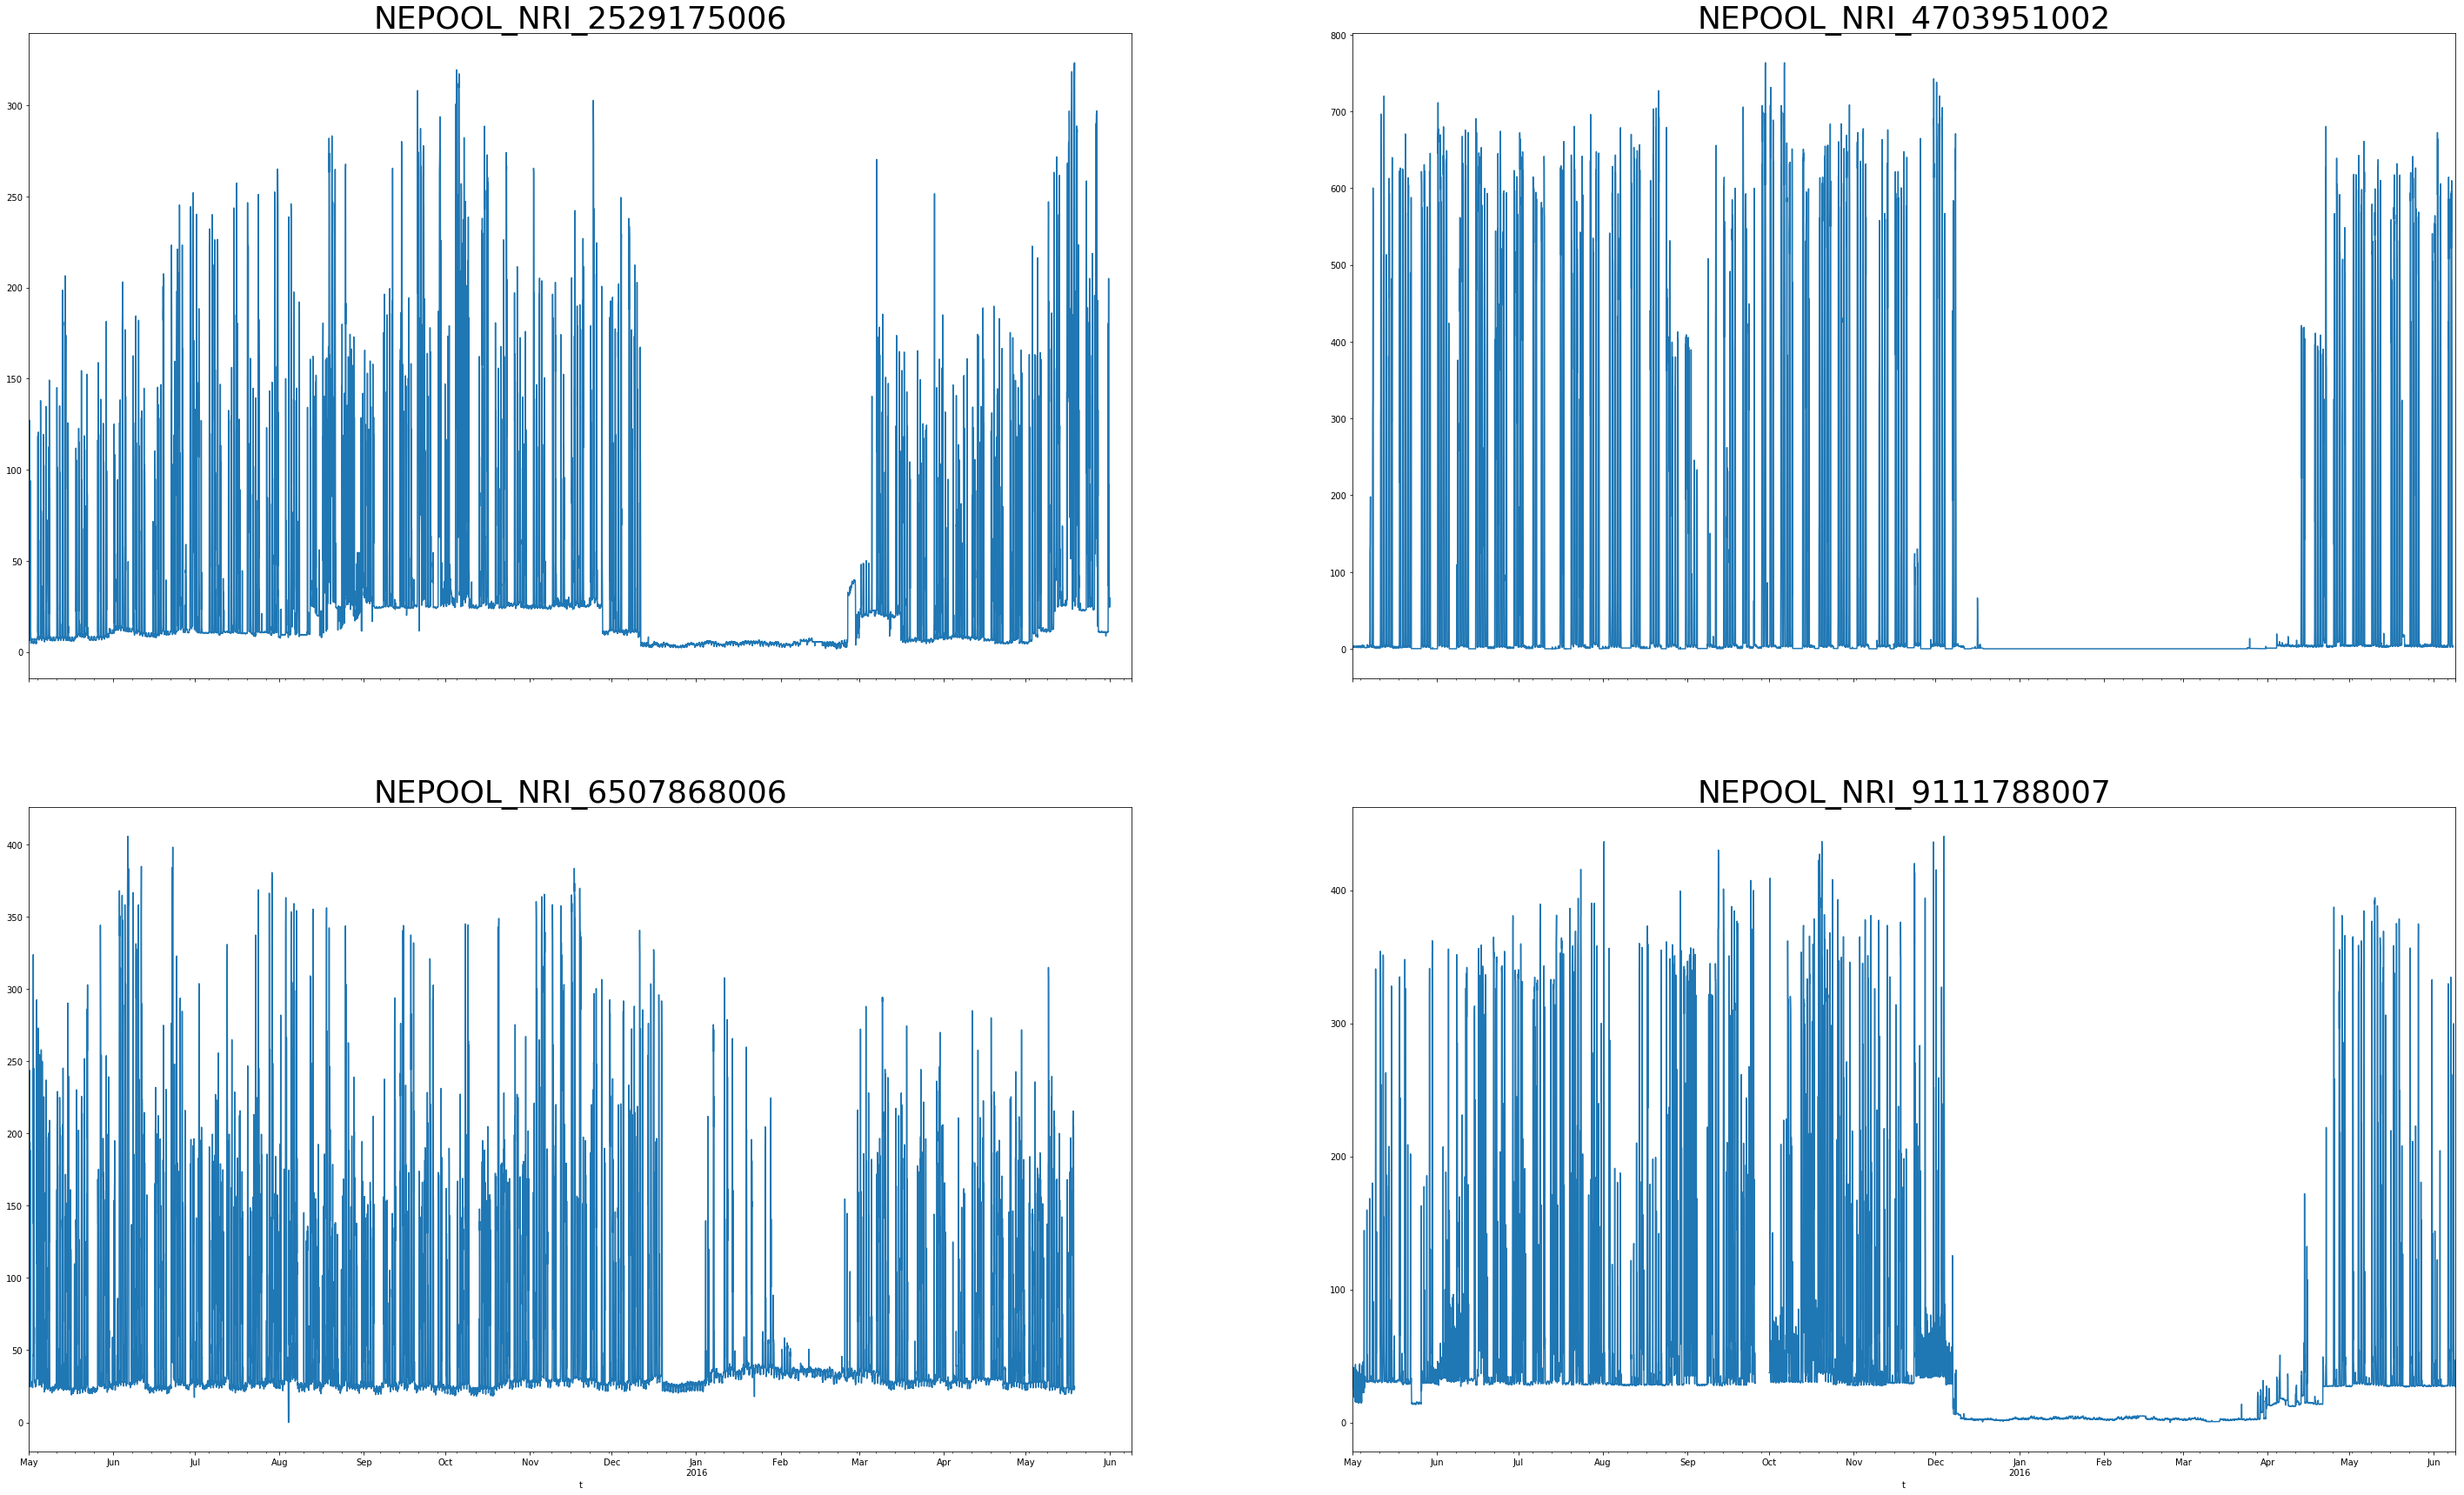

In [7]:
ewx.iter_plot(master)

## Timeshift

In [9]:
for files in filenames:
    ch1 = ewx.forecast_main(files, 4, data, data)

parsing data files...
using filename NEPOOL_NRI_2529175006.csv.
                  time     v
0  2015-05-01 00:00:00  7.84
1  2015-05-01 01:00:00  7.92
2  2015-05-01 02:00:00  7.36
3  2015-05-01 03:00:00  7.84
4  2015-05-01 04:00:00  7.84
read NEPOOL_NRI_2529175006.csv from C:\Users\wb5888\LA-tools\EWX_Forecast\csv.
running data validations...
...
...
...
...
...
usage validated.
running usage estimation flags...
writing validated usage file to .csv...


C:\Users\wb5888\LA-tools\EWX_Forecast\EWX_forecast.py:471: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tmp2.lin[tmp2.lin.isnull()] = tmp2.v[tmp2.lin.isnull()]


wrote NEPOOL_NRI_2529175006.csv to C:\Users\wb5888\LA-tools\EWX_Forecast\csv.
forecasting...


C:\Users\wb5888\LA-tools\EWX_Forecast\EWX_forecast.py:367: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  master = pd.concat([year_data, future], axis = 0)


forecasted year 0 of 5 with 8736 reads.


C:\Users\wb5888\LA-tools\EWX_Forecast\EWX_forecast.py:379: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  master = pd.concat([master, forecast], axis = 0)


forecasted year 1 of 5 with 8736 reads.
forecasted year 2 of 5 with 8736 reads.
forecasted year 3 of 5 with 8736 reads.
forecasted year 4 of 5 with 8736 reads.
writing forecasts to .csv...
wrote NEPOOL_NRI_2529175006_timeshift.csv to C:\Users\wb5888\LA-tools\EWX_Forecast\csv.
parsing data files...
using filename NEPOOL_NRI_4703951002.csv.
                  time     v
0  2015-05-01 00:00:00  2.82
1  2015-05-01 01:00:00  2.97
2  2015-05-01 02:00:00  1.71
3  2015-05-01 03:00:00  2.85
4  2015-05-01 04:00:00  2.79
read NEPOOL_NRI_4703951002.csv from C:\Users\wb5888\LA-tools\EWX_Forecast\csv.
running data validations...
...
...
...
...
...
usage validated.
running usage estimation flags...
writing validated usage file to .csv...
wrote NEPOOL_NRI_4703951002.csv to C:\Users\wb5888\LA-tools\EWX_Forecast\csv.
forecasting...
forecasted year 0 of 5 with 8736 reads.
forecasted year 1 of 5 with 8736 reads.
forecasted year 2 of 5 with 8736 reads.
forecasted year 3 of 5 with 8736 reads.
forecasted yea

### Read in timeshifts

In [8]:
file_df = ewx.sortdir(data, 10)
file_df

files found in dir:  C:\Users\wb5888\LA-tools\EWX_Forecast\csv
                                 files                time
0  NEPOOL_NRI_9111788007_timeshift.csv 2019-06-28 09:17:36
1        NEPOOL_NRI_9111788007_val.csv 2019-06-28 09:17:34
2  NEPOOL_NRI_6507868006_timeshift.csv 2019-06-28 09:17:33
3        NEPOOL_NRI_6507868006_val.csv 2019-06-28 09:17:30
4  NEPOOL_NRI_4703951002_timeshift.csv 2019-06-28 09:17:30
5        NEPOOL_NRI_4703951002_val.csv 2019-06-28 09:17:27
6  NEPOOL_NRI_2529175006_timeshift.csv 2019-06-28 09:17:26
7        NEPOOL_NRI_2529175006_val.csv 2019-06-28 09:17:24
8            NEPOOL_NRI_9111788007.csv 2019-06-28 08:27:02
9            NEPOOL_NRI_6507868006.csv 2019-06-28 08:26:59


,files,time
0,NEPOOL_NRI_9111788007_timeshift.csv,2019-06-28 09:17:36
1,NEPOOL_NRI_9111788007_val.csv,2019-06-28 09:17:34
2,NEPOOL_NRI_6507868006_timeshift.csv,2019-06-28 09:17:33
3,NEPOOL_NRI_6507868006_val.csv,2019-06-28 09:17:30
4,NEPOOL_NRI_4703951002_timeshift.csv,2019-06-28 09:17:30
5,NEPOOL_NRI_4703951002_val.csv,2019-06-28 09:17:27
6,NEPOOL_NRI_2529175006_timeshift.csv,2019-06-28 09:17:26
7,NEPOOL_NRI_2529175006_val.csv,2019-06-28 09:17:24
8,NEPOOL_NRI_9111788007.csv,2019-06-28 08:27:02
9,NEPOOL_NRI_6507868006.csv,2019-06-28 08:26:59


In [9]:
index = [0, 2, 4, 6]
filenames = list(file_df.files[index])
filenames

['NEPOOL_NRI_9111788007_timeshift.csv',
 'NEPOOL_NRI_6507868006_timeshift.csv',
 'NEPOOL_NRI_4703951002_timeshift.csv',
 'NEPOOL_NRI_2529175006_timeshift.csv']

In [23]:
ts_data = []

for m in filenames:
    print('reading meter {}'.format(m))
    meter = m.split('.')[0]
    idr = ewx.read_idr(m, None)
    idr.columns = [m]
    idr.fillna(0, inplace = True)
    ts_data.append((meter, idr))

ts_data = dict(ts_data)
print('read data into dict w/ {} elements.'.format(len(ts_data.keys())))
datasets = list(ts_data.keys())

reading meter NEPOOL_NRI_9111788007_timeshift.csv
reading meter NEPOOL_NRI_6507868006_timeshift.csv
reading meter NEPOOL_NRI_4703951002_timeshift.csv
reading meter NEPOOL_NRI_2529175006_timeshift.csv
read data into dict w/ 4 elements.


In [26]:
ts_master = ewx.merge_idr(ts_data)
ts_master.fillna(0, inplace = True)

                     NEPOOL_NRI_9111788007_timeshift  \
t                                                      
2015-06-10 00:00:00                           31.248   
2015-06-10 01:00:00                           31.104   
2015-06-10 02:00:00                           81.024   
2015-06-10 03:00:00                           78.336   
2015-06-10 04:00:00                           31.056   

                     NEPOOL_NRI_6507868006_timeshift  \
t                                                      
2015-06-10 00:00:00                            33.78   
2015-06-10 01:00:00                            45.42   
2015-06-10 02:00:00                            29.10   
2015-06-10 03:00:00                            29.04   
2015-06-10 04:00:00                            35.10   

                     NEPOOL_NRI_4703951002_timeshift  \
t                                                      
2015-06-10 00:00:00                             5.49   
2015-06-10 01:00:00                           

In [31]:
shift_yr = [a.year > 2017 for a in ts_master.index]
ts_master[shift_yr].head()

,NEPOOL_NRI_9111788007_timeshift,NEPOOL_NRI_6507868006_timeshift,NEPOOL_NRI_4703951002_timeshift,NEPOOL_NRI_2529175006_timeshift
t,,,,
2018-01-01 00:00:00,2.688,35.73,0.0001,4.92
2018-01-01 01:00:00,2.712,35.91,0.0001,5.12
2018-01-01 02:00:00,2.736,36.00,0.0001,5.04
2018-01-01 03:00:00,2.760,35.46,0.0001,5.04
2018-01-01 04:00:00,2.880,35.37,0.0001,5.16


### Plot timeshifts

graphing forecasts...


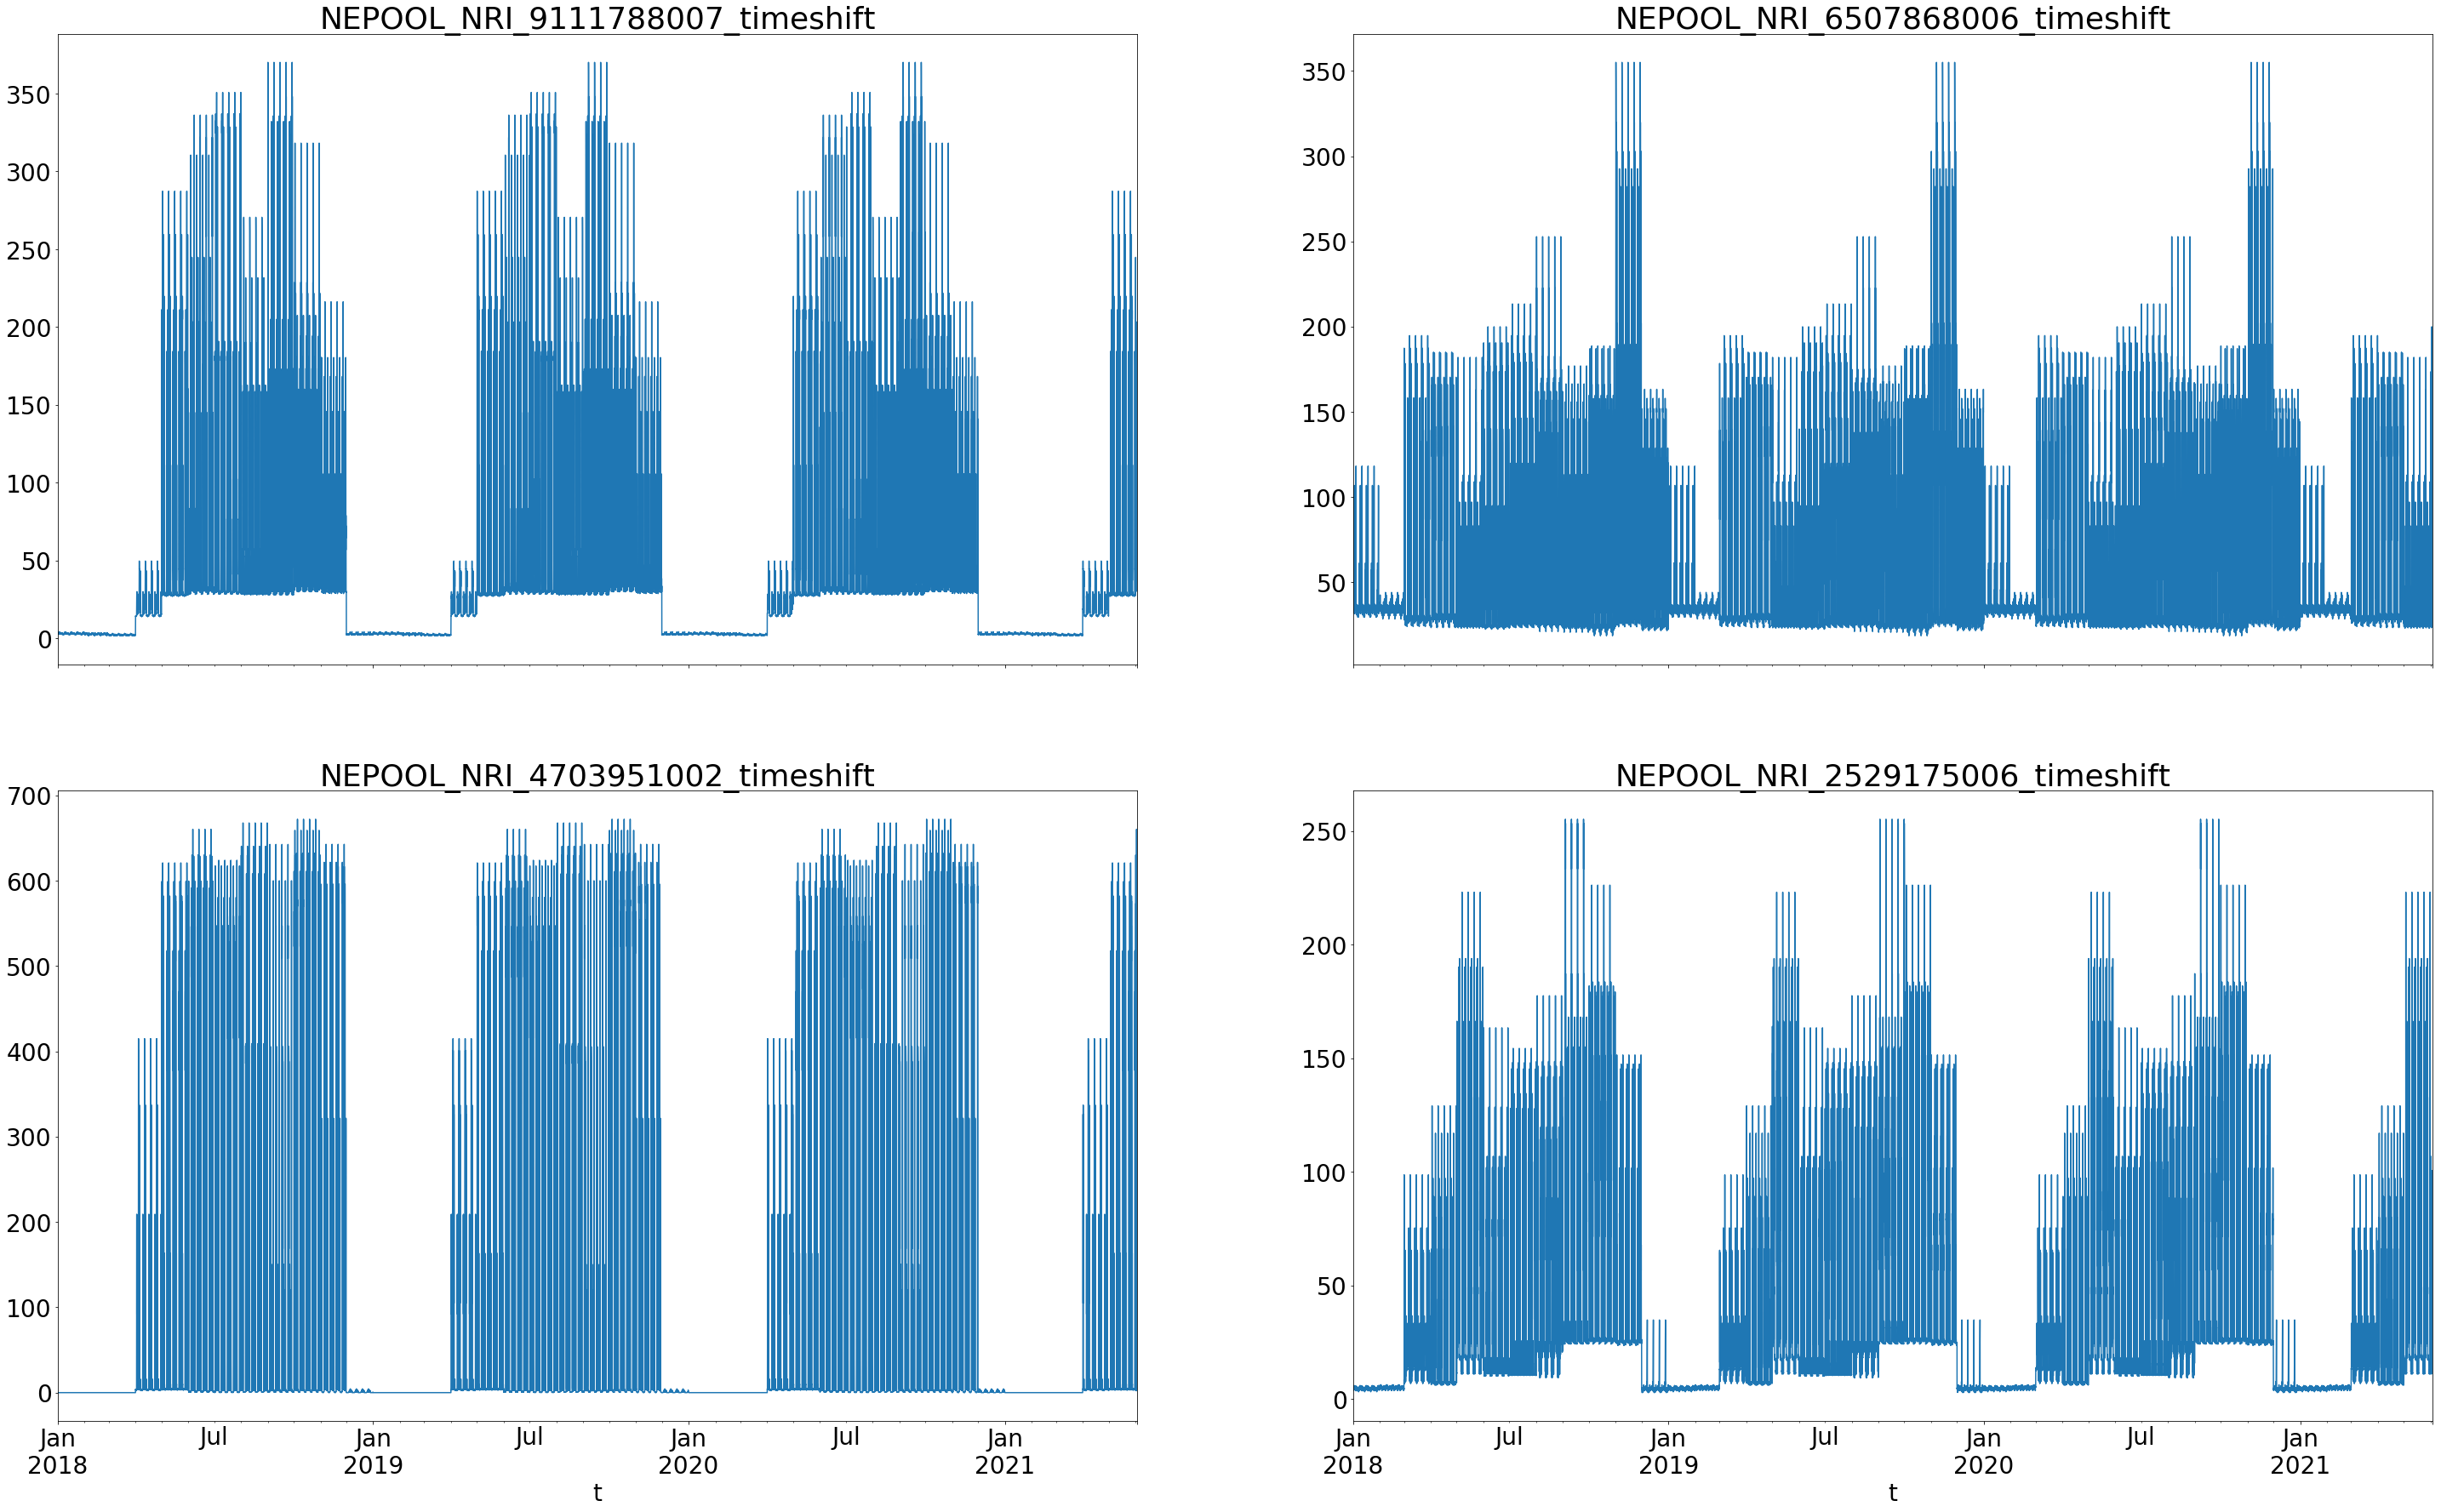

In [32]:
ewx.iter_plot(ts_master[shift_yr])